In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [9]:
# decision tree classifier
#deep and complex trees tend to overfit, so we want to generalize and have
#reasonably simple trees as much as possible
model = tree.DecisionTreeClassifier(max_depth = 8,random_state=42)

In [10]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.66      0.59      0.62        81

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



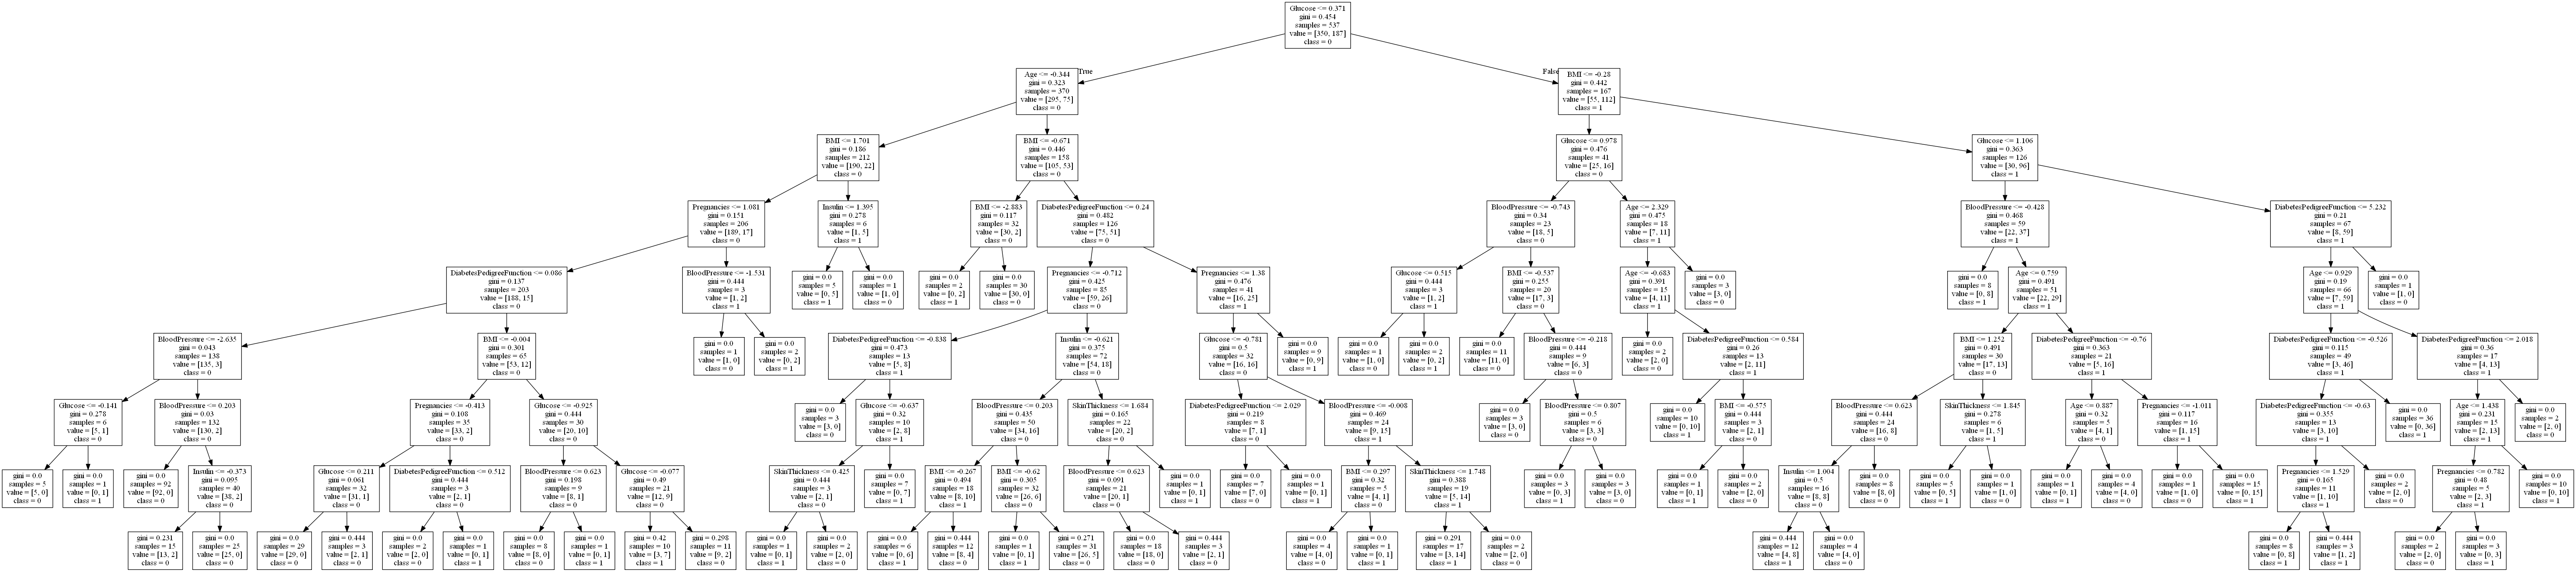

In [12]:
dot_data = tree.export_graphviz(
                model, feature_names = X.columns, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())